In [1]:
import pandas as pd

# Load data
recipes = pd.read_csv("/Users/seonminhwang/Downloads/RAW_recipes_textProc.csv")
interactions = pd.read_csv("/Users/seonminhwang/Downloads/RAW_interactions_textProc.csv")

In [2]:
recipes.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,make choic proceed recip depend size squash cu...,autumn favorit time year cook recip prepar eit...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,preheat oven degre f press dough bottom side i...,recip call crust prebak bit ad ingredi feel fr...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,brown ground beef larg pot add chop onion grou...,modifi version mom chili hit christma parti ma...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,place potato larg pot lightli salt water bring...,super easi great tast make ahead side dish loo...,"['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,mix ingredi boil hour thick pour jar use old g...,dh amish mother rais recip much prefer store b...,"['tomato juice', 'apple cider vinegar', 'sugar...",8


In [3]:
interactions.head()

,user_id,recipe_id,date,rating,review
0,0,225877,2003-02-17,4,great salad cook top stove minut ad shake caye...
1,1,225877,2011-12-21,5,simpl delici great chilli fall even doubl br b...
2,2,71599,2002-12-01,4,work well easi use quit whole packag white chi...
3,3,14906,2010-02-27,5,made mexican top took bunko everyon love
4,4,14906,2011-10-01,5,made cheddar bacon top ad sprinkl black pepper...


In [4]:
data = pd.merge(interactions, recipes, left_on="recipe_id", right_on="id")

# Select relevant fields
data = data[['rating', 'review', 'tags', 'ingredients', 'name', 'description']]

# Combine textual fields into a single column (rating, review, tags, ingredients, name, description)
data['text'] = data[['review', 'tags', 'ingredients', 'name', 'description']].apply(
    lambda row: ' '.join([str(x) for x in row if pd.notnull(x)]), axis=1
)
# Drop rows with missing or invalid ratings
data = data.dropna(subset=['rating', 'text'])

In [5]:
data.head()

,rating,review,tags,ingredients,name,description,text
0,4,work well easi use quit whole packag white chi...,"['60-minutes-or-less', 'time-to-make', 'course...","['fresh corn', 'red bell pepper', 'garlic', 'c...",roasted corn and chipotle salsa,sensat savori salsa publish houston chronicl,work well easi use quit whole packag white chi...
1,5,made mexican top took bunko everyon love,"['60-minutes-or-less', 'time-to-make', 'course...","['white sugar', 'butter', 'eggnog', 'vanilla e...",eggnog cookies,delect treat eggnog lover everywher cooki wond...,made mexican top took bunko everyon love ['60-...
2,5,made cheddar bacon top ad sprinkl black pepper...,"['60-minutes-or-less', 'time-to-make', 'course...","['white sugar', 'butter', 'eggnog', 'vanilla e...",eggnog cookies,delect treat eggnog lover everywher cooki wond...,made cheddar bacon top ad sprinkl black pepper...
3,4,sweet wait day bought pint raspberri ad mix go...,"['30-minutes-or-less', 'time-to-make', 'course...","['pomegranate juice', 'apple cider', 'sugar', ...",pomegranate apple cocktails,look realli interest want save recip novemb is...,sweet wait day bought pint raspberri ad mix go...
4,0,observ rate follow procedur strawberri instead...,"['30-minutes-or-less', 'time-to-make', 'course...","['pomegranate juice', 'apple cider', 'sugar', ...",pomegranate apple cocktails,look realli interest want save recip novemb is...,observ rate follow procedur strawberri instead...


In [6]:
from sklearn.model_selection import train_test_split

# Define features (text) and target (rating)
X = data['text']
y = data['rating']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)

# Fit and transform the training data
X_train_tfidf = vectorizer.fit_transform(X_train)

# Transform the test data
X_test_tfidf = vectorizer.transform(X_test)

In [8]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

# Multinomial Logistic Regression (Low efficiency)
#model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=500)
#model.fit(X_train_tfidf, y_train)
#y_pred = model.predict(X_test_tfidf)
#print("Classification Report:")
#print(classification_report(y_test, y_pred))
#print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

# Train a Ridge Regression model
rr_model = Ridge()
rr_model.fit(X_train_tfidf, y_train)
rr_y_pred = rr_model.predict(X_test_tfidf)
rr_mse = mean_squared_error(y_test, rr_y_pred)
print(f"Mean Squared Error: {rr_mse:.2f}")

# Train an XGBoost regressor
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
xgb_model.fit(X_train_tfidf, y_train)
xgb_y_pred = xgb_model.predict(X_test_tfidf)
xgb_mse = mean_squared_error(y_test, xgb_y_pred)
print(f"Mean Squared Error (XGBoost): {xgb_mse:.2f}")

# Train an RandomForest regressor (Low efficiency)
#rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
#rf_model.fit(X_train_tfidf, y_train)
#rf_y_pred = rf_model.predict(X_test_tfidf)
#rf_mse = mean_squared_error(y_test, rf_y_pred)
#print(f"Mean Squared Error (Random Forest): {rf_mse:.2f}")

Mean Squared Error: 1.34
Mean Squared Error (XGBoost): 1.37


In [9]:
# Display some predictions
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': rr_y_pred})
print(predictions.head())

# Analyze the most important words (coefficients)
feature_names = vectorizer.get_feature_names_out()
coefficients = rr_model.coef_

# Get top 10 positive and negative words
top_positive_indices = coefficients.argsort()[-10:]
top_negative_indices = coefficients.argsort()[:10]

print("Top Positive Words:")
for i in top_positive_indices:
    print(f"{feature_names[i]}: {coefficients[i]:.2f}")

print("\nTop Negative Words:")
for i in top_negative_indices:
    print(f"{feature_names[i]}: {coefficients[i]:.2f}")


        Actual  Predicted
337294       5   4.676326
553295       0   4.734133
402352       0   4.549567
507356       5   3.811437
53832        4   4.428855
Top Positive Words:
wonder: 1.91
outstand: 1.92
fantast: 2.04
perfect: 2.05
thanx: 2.08
love: 2.26
great: 2.40
delici: 2.44
excel: 2.53
thank: 4.64

Top Negative Words:
worst: -6.16
sorri: -5.78
horribl: -5.65
terribl: -4.92
tasteless: -4.54
wast: -4.49
aw: -4.49
bland: -4.33
disgust: -3.93
preparation: -3.80


In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Define a function to transform a text column into TF-IDF features
def compute_tfidf_features(data, column_name, max_features=10):
    vectorizer = TfidfVectorizer(stop_words='english', max_features=max_features)
    tfidf_matrix = vectorizer.fit_transform(data[column_name].fillna(''))
    feature_names = vectorizer.get_feature_names_out()
    tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=[f"{column_name}_{feat}" for feat in feature_names])
    return tfidf_df

# Process each textual column
tfidf_review = compute_tfidf_features(data, 'review')
tfidf_tags = compute_tfidf_features(data, 'tags')
tfidf_ingredients = compute_tfidf_features(data, 'ingredients')
tfidf_name = compute_tfidf_features(data, 'name')
tfidf_description = compute_tfidf_features(data, 'description')


In [11]:
# Combine all TF-IDF features
tfidf_combined = pd.concat([tfidf_review, tfidf_tags, tfidf_ingredients, tfidf_name, tfidf_description], axis=1)

# Add the rating column
tfidf_combined['rating'] = data['rating'].reset_index(drop=True)

tfidf_combined.describe()

,review_ad,review_good,review_great,review_like,review_love,review_make,review_recip,review_thank,review_time,review_use,...,description_easi,description_good,description_great,description_like,description_make,description_recip,description_serv,description_time,description_use,rating
count,621641.000000,621641.000000,621641.000000,621641.000000,621641.000000,621641.000000,621641.000000,621641.000000,621641.000000,621641.000000,...,621641.000000,621641.000000,621641.000000,621641.000000,621641.000000,621641.000000,621641.000000,621641.000000,621641.000000,621641.000000
mean,0.104744,0.137876,0.134553,0.111192,0.136659,0.177422,0.229008,0.181754,0.106576,0.216283,...,0.089338,0.084788,0.095913,0.080034,0.140311,0.231591,0.088879,0.090939,0.108101,4.411184
std,0.238923,0.266087,0.257624,0.245041,0.263536,0.274020,0.286656,0.251263,0.234581,0.291206,...,0.235847,0.235633,0.248796,0.227105,0.274565,0.336616,0.240976,0.238904,0.251421,1.263383
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.376767,0.443820,0.364099,0.000000,0.443512,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.455551,0.000000,0.000000,0.000000,5.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000


In [12]:
# Compute correlations
correlation_matrix = tfidf_combined.corr()

# Extract correlations with the rating column
rating_correlation = correlation_matrix['rating'].sort_values(ascending=False)

# Display the top 10 features most correlated with ratings
print("Top 10 TF-IDF Features Correlated with Rating:")
print(rating_correlation.head(10))

Top 10 TF-IDF Features Correlated with Rating:
rating                1.000000
review_thank          0.155120
review_love           0.095146
review_great          0.087177
review_use            0.041115
review_make           0.024449
ingredients_garlic    0.005335
description_like      0.003904
review_ad             0.003291
description_make      0.002884
Name: rating, dtype: float64


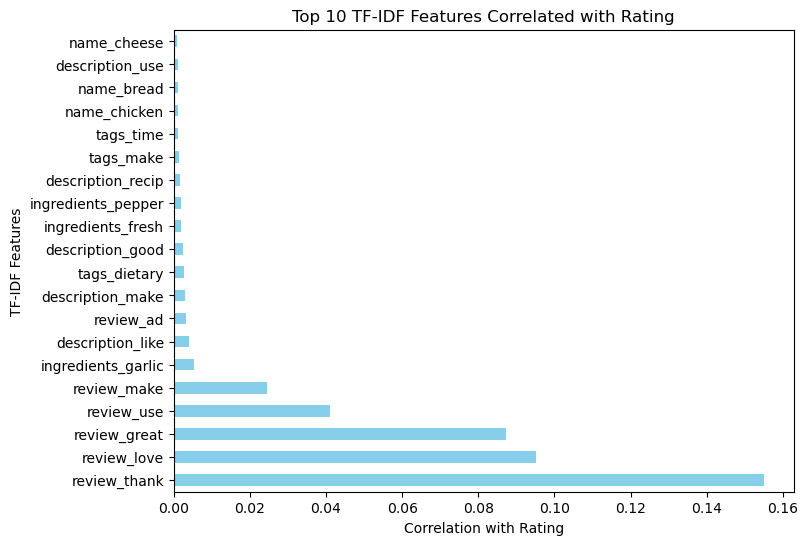

In [13]:
# Visualize the top features
import matplotlib.pyplot as plt

rating_correlation[1:21].plot(kind='barh', figsize=(8, 6), color='skyblue')
plt.title("Top 10 TF-IDF Features Correlated with Rating")
plt.xlabel("Correlation with Rating")
plt.ylabel("TF-IDF Features")
plt.show()